# Analiza sytuacji kredytobiorców w Stanach Zjednoczonych oraz odkrywanie relacji pomiędzy pożyczkami, a aspektami socjoekonomicznymi i geopolitycznymi.

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
colors = [(0, 18, 25), (0, 95, 115), (10, 147, 150), (148, 210, 189), (233, 216, 166), (238, 155, 0), (202, 103, 2), (187, 62, 3), (174, 32, 18), (155, 34, 38)]
colors = [[val / 255 for val in col] for col in colors]

df = pd.read_csv('dane.csv')
df

In [ ]:
# Yearly income

yi_xlabels = ['0 - 20k', '20k - 40k', '40k - 60k', '60k - 80k', '80k - 100k', '100k - 150k', '150k - 200k', '200k - 500k', '>500k']

out = pd.cut(df['Yearly_Income'], bins=[0, 2e4, 4e4, 6e4, 8e4, 1e5, 1.5e5, 2e5, 5e5, 1e9], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=45,
                                           figsize=(12, 8),
                                           title='Yearly incomes comparison',
                                           xlabel='Income range [$]',
                                           ylabel='Number of loans',
                                           grid=True,
                                           color=colors)
axs = ax.set_xticklabels(yi_xlabels)

In [ ]:
# Lend amount ASC

la_xlabels = ['0 - 10k', '10k - 20k', '20k - 30k', '30k - 40k', '40k - 50k', '>50k']

out = pd.cut(df['Lend_Amount'], bins=[0, 1e4, 2e4, 3e4, 4e4, 5e4, 6e4], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=45,
                                           figsize=(12,8),
                                           title='Lend amount comparison',
                                           xlabel='Lend amount [$]',
                                           ylabel='Number of loans',
                                           grid=True,
                                           color=colors)
axs = ax.set_xticklabels(la_xlabels)

In [ ]:
# Experience counts

ec_xlabels = ['<1yr', '1yrs', '2yrs', '3yrs', '4yrs', '5yrs', '6yrs', '7yrs', '8yrs' ,'9yrs' ,'>10yrs']
df.Experience.value_counts().reindex(ec_xlabels).plot.bar(rot=45,
                                                          figsize=(12,8),
                                                          title='Work experience comparison',
                                                          xlabel='Work experience',
                                                          ylabel='Number of people',
                                                          grid=True,
                                                          color=colors)

In [ ]:
# Home status counts

df.Home_Status.value_counts().plot.bar(rot=45,
                                       figsize=(12,8),
                                       title='Home Status comparison',
                                       xlabel='Home status',
                                       ylabel='Number of people',
                                       grid=True,
                                       color=colors)

In [ ]:
# Reason

df.Reason.value_counts().plot.bar(rot=60,
                                  figsize=(12,8),
                                  title='Reasons for taking a loan',
                                  xlabel='Reason',
                                  ylabel='Number of people',
                                  grid=True,
                                  color=colors)

In [ ]:
# Yearly income vs Lend Amount
ax = df.plot.scatter(x='Lend_Amount',
                     y='Yearly_Income',
                     figsize=(12,8),
                     xlabel='Lend amount',
                     ylabel='Yearly income',
                     title='Income and lend amount'
                     )

In [ ]:
# USA heatmap
usa_map = gpd.read_file('usa_map_data/usa-states-census-2014.shp')
usa_map.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')
ax.asis('off')
ax.set_title('test123', fontdict={'fontsize': '25', 'fontweight': '3'})
df.plot(column = col)

In [ ]:
usa_map.sort_values(by='NAME')

In [ ]:
state_count = {}

for row in usa_map.iloc:
    state_count[row['NAME'].replace(' ','').lower()] = 0
    state_count[row['STUSPS'].lower()] = 0

for row in df.iloc:
    try:
        state_count[row['State'].lower()] += 1
    except KeyError:
        continue

In [161]:
keys_list = list(state_count)
filtered_state_count = {}

for i in range(0, len(state_count), 2):
    filtered_state_count[keys_list[i + 1]] = max(
        state_count[keys_list[i]],
        state_count[keys_list[i + 1]]
    )
    
list_for_df = []

for row in usa_map.iloc:
    list_for_df.append(filtered_state_count[row['STUSPS'].lower()])
    
usa_map['CUSTOMER_COUNT'] = list_for_df
usa_map

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry,CUSTOMER_COUNT
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...",12625
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04...",235
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",5813
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...",2924
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117....",0
5,17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458,Midwest,"POLYGON Z ((-91.50617 40.20064 0.00000, -91.49...",3502
6,19,01779785,0400000US19,19,IA,Iowa,00,144668594415,1076856589,Midwest,"POLYGON Z ((-96.62187 42.77925 0.00000, -96.57...",0
7,21,01779786,0400000US21,21,KY,Kentucky,00,102262419204,2393338940,Southeast,"POLYGON Z ((-89.54443 36.57451 0.00000, -89.47...",821
8,22,01629543,0400000US22,22,LA,Louisiana,00,111901043977,23750204105,Southeast,"POLYGON Z ((-94.04305 32.69303 0.00000, -94.04...",1019
9,24,01714934,0400000US24,24,MD,Maryland,00,25147575220,6983455225,Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",2073


<AxesSubplot:>

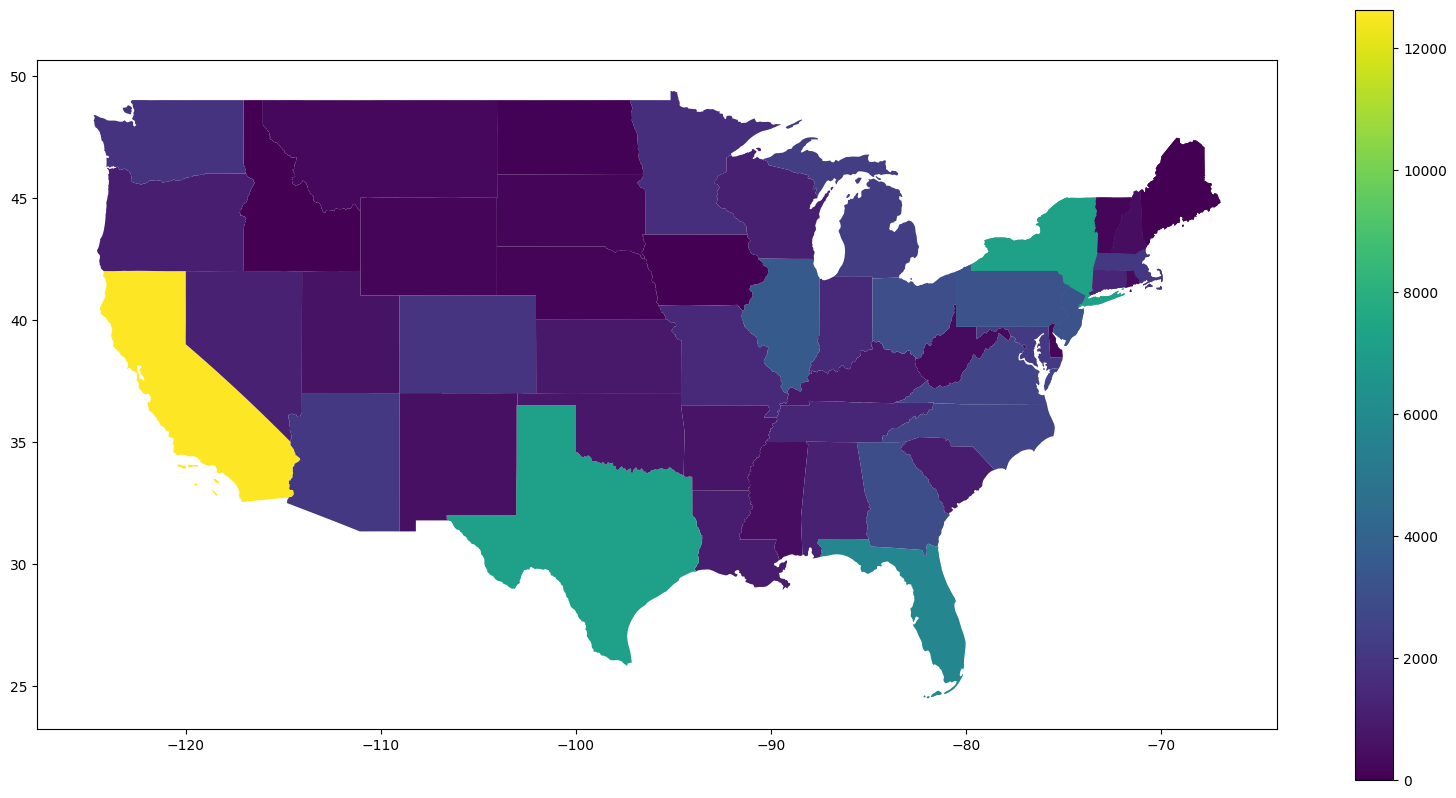

In [166]:
usa_map.plot(column='CUSTOMER_COUNT', legend='True', figsize=(20,10))